In [1]:
import pandas as pd

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/timesend/Network_Graph_project/master/datasets/dataset.csv')

In [48]:
df = df.sort_values(by=['user_id','date_created'])


In [49]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


## create the edges

In [25]:
df['source'] = df['book']
df['target'] = df['source'].shift(-1)

In [26]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target,target_user
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1,bhargava,fain3,-2146355313
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,fain3,ramamurthy,-2146355313
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,ramamurthy,thomas,-2146355313
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1,thomas,prasanna,-2146168866
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0,prasanna,mcnamara,-2145886989


In [29]:
# ensure that the edges are the same user. 
df['target_user'] = df['user_id'].shift(-1)

In [39]:
df = df[df.user_id == df.target_user]

In [40]:
df[['user_id', 'source', 'target']]

,user_id,source,target
1,-2146355313,fain3,ramamurthy
2,-2146355313,ramamurthy,thomas
29,-2145886989,mcnamara,mcnamara
32,-2145886989,mcnamara,mcnamara
7,-2145886989,mcnamara,mcnamara
...,...,...,...
4989,-2019295583,roestenburg,roestenburg
4990,-2019295583,roestenburg,roestenburg
4991,-2019295583,roestenburg,roestenburg
4992,-2019295583,roestenburg,roestenburg


In [44]:
# drop the edges that doesnt point to anything
df = df.dropna()

## draw the graph

In [45]:
import networkx as nx
G=nx.from_pandas_edgelist(df,"source",'target', create_using=nx.DiGraph)

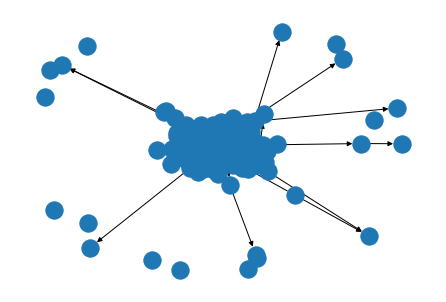

In [46]:
nx.draw(G)

In [43]:
df.to_csv("./datasets/graph_data.csv")